In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as pd
from pygem_eb.processing.plotting_fxns import *
from objectives import *
import os

In [156]:
ds,s,e = getds('../Output/EB/grid_11_08_set14_run3_0.nc')
ds = dsdict['2024']['B']['2']['0.025']['2.5']['ds']
# simple_plot(ds,[s,e],[['dh']])
print(dsdict['2024']['B']['2']['0.025']['2.5']['MAE'])

5.8671876897000885


In [ ]:
id = 0
fig,axes = plt.subplots(1,6,figsize=(8,4),sharey=True,sharex=True,gridspec_kw={'wspace':0})
for i,site in enumerate(['AB','ABB','B','BD','D','T']):
# for i, site in enumerate(['B','D']):
    ds,startdate,enddate = getds(f'../Output/EB/Gulkana_11_11_2024{site}_{id}.nc')
    # ds = dsdict['2024']['B']['2']['0.025']['2.5']['ds']
    if site == 'B':
        bds = ds.copy(deep=True)
    axes[i],error = cumulative_mass_balance(site,ds,plot_ax=axes[i])
    axes[i].set_title(f'Site {site}',fontsize=12)
    axes[i].set_ylabel('')
    # direction = '' if error < 0 else '+'
    # text = f'{direction}{error:.3f} m'
    # axes[i].text(enddate-pd.Timedelta(days=80),0.9,text,fontsize=10)
    axes[i].get_legend().remove()
    axes[i].set_xlim(startdate,enddate)
    axes[i].set_xticks(pd.date_range(startdate,enddate,freq='2MS'))
    axes[i].tick_params(labelsize=10)
    axes[i].yaxis.set_ticks_position('both')
    if site not in ['ABB','BD']:
        mbmod,mbmeas = cumulative_mass_balance(site,ds,out_mbs=True)
        meas = axes[i].scatter(enddate-pd.Timedelta(days=2),mbmeas,color='red',marker='o',facecolors='none',s=100)
        mod = axes[i].scatter(enddate-pd.Timedelta(days=2),mbmod,color='red',marker='+',s=100)
axes[-1].set_ylabel('Summer mass balance (m w.e.)',fontsize=12,color='red')
axes[-1].yaxis.set_label_position('right')
axes[-2].yaxis.set_tick_params(length=5)
axes[-1].yaxis.set_ticks_position('right')
axes[-1].tick_params(labelright=True,axis='y',labelcolor='red',colors='red')
for ax in axes:
    ax.set_xlim(pd.to_datetime('2024-04-20'),pd.to_datetime('2024-08-20'))
    ax.set_ylim(-6,1)
    if ax != axes[-1]:
        ax.yaxis.set_ticks_position('both')
axes[0].set_ylabel('Surface height change (m)',fontsize=12)
l1, = axes[-1].plot(np.nan,np.nan,color=plt.cm.Dark2(0))
l2, = axes[-1].plot(np.nan,np.nan,color='black',linestyle='--')
l3, = axes[-1].plot(np.nan,np.nan,color='gray',linestyle=':')
leg = fig.legend([l1,l2,l3,meas,mod],['Model','GNSS-IR','Banded Stake','Stake survey','Model'],ncols=2,fontsize=10,bbox_to_anchor=(0.7,0.32))
leg.get_frame().set_facecolor('white')
leg.get_frame().set_alpha(1)
leg.set_zorder(100)
plt.savefig(f'/home/claire/research/Output/EB/gulkana_dh_cols.png',dpi=180,bbox_inches='tight')
plt.show()

In [ ]:
df = pd.read_csv('../climate_data/')

Site AB internal acc: 0.00005 m w.e.
Site AB internal acc: 0.00005 m w.e.
Site B internal acc: 0.00017 m w.e.
Site B internal acc: 0.00017 m w.e.
Site D internal acc: 0.07039 m w.e.
Site D internal acc: 0.07039 m w.e.
Site T internal acc: 0.08668 m w.e.
Site T internal acc: 0.08668 m w.e.


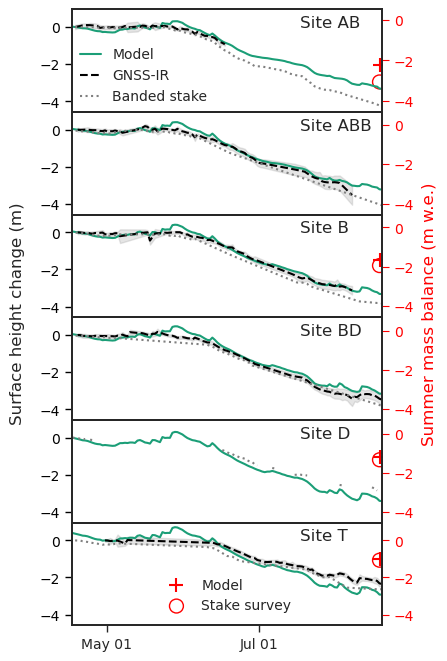

In [168]:
id = 0
fig,axes = plt.subplots(6,figsize=(4,8),sharey=True,sharex=True,gridspec_kw={'hspace':0})
for i,site in enumerate(['AB','ABB','B','BD','D','T']):
# for i, site in enumerate(['B','D']):
    ds,startdate,enddate = getds(f'../Output/EB/Gulkana_11_11_2024{site}_{id}.nc')
    # ds = dsdict['2024']['B']['2']['0.025']['2.5']['ds']
    if site == 'B':
        bds = ds.copy(deep=True)
    axes[i],error = cumulative_mass_balance(site,ds,plot_ax=axes[i])
    axes[i].set_title('')
    axes[i].text(pd.to_datetime('2024-07-18'),0,f'Site {site}',fontsize=12)
    axes[i].set_ylabel('')
    # direction = '' if error < 0 else '+'
    # text = f'{direction}{error:.3f} m'
    # axes[i].text(enddate-pd.Timedelta(days=80),0.9,text,fontsize=10)
    axes[i].get_legend().remove()
    axes[i].set_xlim(startdate,enddate)
    axes[i].set_xticks(pd.date_range(startdate,enddate,freq='2MS'))
    axes[i].tick_params(labelsize=10)
    axes[i].yaxis.set_ticks_position('both')
    axes[i].tick_params(axis='y',which='both',labelcolor='black',colors='black',left=True,right=False)
    axes_right = axes[i].twinx()
    axes_right.tick_params(axis='y',length=5,which='both',labelcolor='red',colors='red',right=True,left=False)
    ax.set_xlim(s,e)
    ax.set_ylim(-5,2)
    axes_right.set_ylim(axes[i].get_ylim())
    if site not in ['ABB','BD']:
        mbmod,mbmeas = cumulative_mass_balance(site,ds,out_mbs=True)
        meas = axes[i].scatter(enddate-pd.Timedelta(days=1),mbmeas,color='red',marker='o',facecolors='none',s=100)
        mod = axes[i].scatter(enddate-pd.Timedelta(days=1),mbmod,color='red',marker='+',s=100)

fig.text(1,0.5,'Summer mass balance (m w.e.)',fontsize=12,color='red',va='center',rotation='vertical')
fig.text(-0.03,0.5,'Surface height change (m)',fontsize=12,va='center',rotation='vertical')
axes[-1].legend([mod,meas],['Model','Stake survey'],fontsize=10,loc='lower center')
axes[0].legend(fontsize=10,handlelength=1.5,loc='lower left',borderaxespad=0.2)
plt.savefig(f'/home/claire/research/Output/EB/gulkana_dh_rows.png',dpi=180,bbox_inches='tight')
# plt.show()

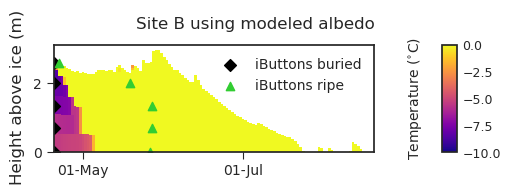

In [ ]:
ripe_dict = {'AU': {10: pd.Timestamp('2024-04-21 22:45:00'), 40: pd.Timestamp('2024-04-26 05:30:00'), 80: pd.Timestamp('2024-05-01 14:30:00'), 150: pd.Timestamp('2024-04-27 14:30:00')}, 'B': {10: pd.Timestamp('2024-04-21 21:15:00'), 70: pd.Timestamp('2024-05-18 20:15:00'), 135: pd.Timestamp('2024-05-27 08:45:00'), 200: pd.Timestamp('2024-05-27 11:30:00'), 270: pd.Timestamp('2024-05-26 18:30:00')}, 'D': {10: pd.Timestamp('2024-06-01 18:00:00'), 40: pd.Timestamp('2024-06-02 14:15:00'), 80: pd.Timestamp('2024-06-02 16:45:00'), 120: pd.Timestamp('2024-06-05 14:00:00'), 150: pd.Timestamp('2024-06-05 08:45:00')}}
dsdict['B'] = xr.open_dataset(f'../Output/EB/Gulkana_11_07_2024B_9.nc')
for site in ['B']:
    ripe_dates = {}
    # ksnow = ds.attrs['k_snow']
    if site =='D':
        fig,ax = visualize_layers(dsdict[site],pd.date_range('2024-04-20','2024-08-20'),['layertemp'],ylim=10)
    else:
        fig,ax = visualize_layers(dsdict[site],pd.date_range('2024-04-20','2024-08-20'),['layertemp'])
    
    # Scatter initial heights of iButtons
    depths = np.array([f for f in ripe_dict[site]])
    heights = depths[-1] - depths
    start = np.array([pd.to_datetime('2024-04-20') for _ in range(len(heights))])
    if site == 'D':
        heights += 1200
    ax.scatter(start,heights/100,color='black',marker='D',label='iButtons buried')
    
    # Scatter ripened dates for each sensor
    for depth in ripe_dict[site]:
        if site != 'B':
            height = 150 - depth
        else:
            height = 270 - depth
        if site == 'D':
            height += 1200
        ax.scatter(ripe_dict[site][depth],height/100,marker='^',color='limegreen')
    ax.scatter(np.nan,np.nan,marker='^',color='limegreen',label='iButtons ripe')
    ax.legend()
    ax.grid(False)
    fig.suptitle(f'Site {site} using modeled albedo')
    # plt.show()
    plt.savefig('../Output/EB/snow_ripe_modeleda.png',dpi=180,bbox_inches='tight')

In [120]:
site_profiles = {'A':[],'B':[],'D':[]}
for site in site_profiles:
    fp = '../MB_data/Point/gulkana/pitcore/'
    files = os.listdir(fp)
    profiles = {'sbd':{},'density':{}}
    for f in files:
        s = f.split('_')[-1].split('.')[0]
        if s == site and 'Pit' in f:
            if '_04' in f or '.04' in f:
                year = f[8:12]
                if year[-1] == '.':
                    year = f[7:11]
                year = int(year)
                df = pd.read_csv(fp + f)
                if len(df['sample_bottom_depth']) > 2:
                    profiles['sbd'][year] = df['sample_bottom_depth'].to_numpy() /100
                    density = df['sample_weight'] / df['volume'] * 1000
                    profiles['density'][year] = density.to_numpy()
    site_profiles[site] = profiles

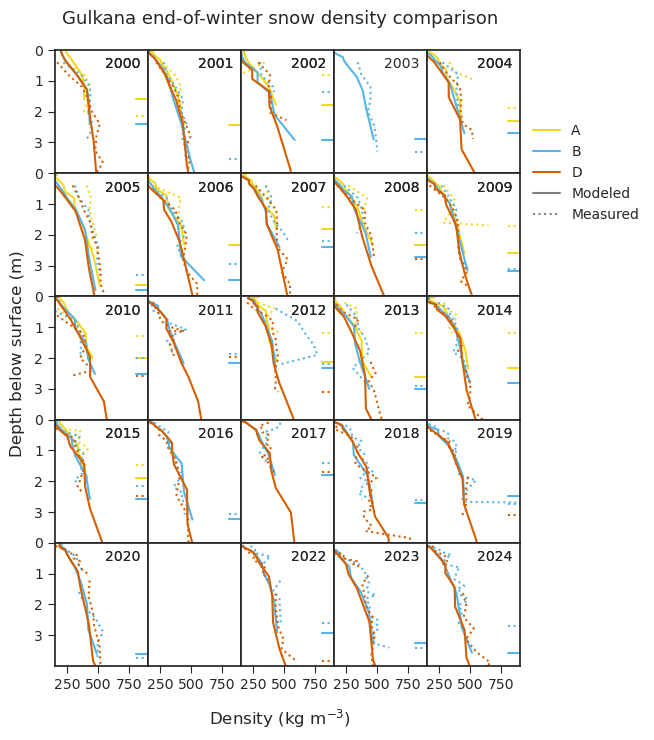

In [ ]:
years = np.arange(2000,2025)
fig,axes = plt.subplots(5,5,figsize=(6,8),sharex=True,sharey=True,gridspec_kw={'hspace':0,'wspace':0})
axes = axes.flatten()
norm = mpl.colors.Normalize(vmin=0,vmax=4)
# cmap = mpl.colormaps.get_cmap('viridis')
colors = ['#F4D81C','#56B4E9','#D55E00']
for ss,site in enumerate(site_profiles):
    # color = cmap(norm(ss))
    color = colors[ss]
    # ds,s,e =  getds(f'../Output/EB/11_04/Gulkana_2024_11_04_long{site}_2.nc')
    # ds = dsdict[site]['0-2']['0.018']['3']
    profiles = site_profiles[site]
    for y,year in enumerate(years):
        ax = axes[y]
        if year in profiles['sbd']:
            dsyear = ds.sel(time=pd.to_datetime(f'{year}-04-20'))
            lheight = dsyear.layerheight.values
            ldepth = np.array([np.sum(lheight[:i+1])-(lheight[i]/2) for i in range(len(lheight))])
            ldensity = dsyear['layerdensity'].values
            interp_density = np.interp(profiles['sbd'][year],ldepth,ldensity)
            diff = profiles['density'][year] - interp_density
            # ax.plot(diff,profiles['sbd'][year],color=cmap(norm(ss)))
            ax.set_title('')
            ax.text(550,0.6,str(year),fontsize=10)
            snow_idx = np.where(ldensity < 750)[0]

            # plot_meas_density = np.append(profiles['density'][year],900)
            # plot_meas_depth = np.append(profiles['sbd'][year],profiles['sbd'][year][-1])
            # plot_model_density = np.append(ldensity[snow_idx],900)
            # plot_model_depth = np.append(ldepth[snow_idx],ldepth[snow_idx[-1]])
            plot_meas_density = profiles['density'][year]
            plot_meas_depth = profiles['sbd'][year]
            plot_model_density = ldensity[snow_idx]
            plot_model_depth = ldepth[snow_idx]

            ax.plot(plot_model_density,plot_model_depth,color=color)
            ax.plot(plot_meas_density,plot_meas_depth,color=color,linestyle=':')
            snowdepth_mod = ldepth[snow_idx[-1]]
            snowdepth_pit = profiles['sbd'][year][-1]
            ax.plot([800,900],[snowdepth_mod,snowdepth_mod],color=color)
            ax.plot([800,900],[snowdepth_pit,snowdepth_pit],color=color,linestyle=':')
    axes[4].plot(np.nan,np.nan,label=site,color=color)
axes[4].plot(np.nan,np.nan,label='Modeled',color='grey')
axes[4].plot(np.nan,np.nan,label='Measured',linestyle=':',color='grey')
for a,ax in enumerate(axes):
    ax.invert_yaxis()
    ax.set_ylim(4,0)
    ax.set_yticks([0,1,2,3])
    ax.tick_params(length=5,labelsize=10)
    # ax.set_xlim(-350,350)
    if a % 5 != 0:
        ax.tick_params('y',length=0)
    ax.set_xlim(150,900)
    ax.set_xticks([250,500,750])
    ax.axvline(0,linewidth=0.5,color='black')
fig.supxlabel('Density (kg m$^{-3}$)',fontsize=12,y=0.03)
fig.supylabel('Depth below surface (m)',fontsize=12,x=0.05)
# axes[0].legend(bbox_to_anchor=(5.6,0.65))
axes[4].legend(bbox_to_anchor=(1,0.5))
fig.suptitle(f'Gulkana end-of-winter snow density comparison',fontsize=13,y=0.93)
# plt.show()
plt.savefig(f'../Output/EB/gulkana_pits_modeled.png',dpi=220,bbox_inches='tight')

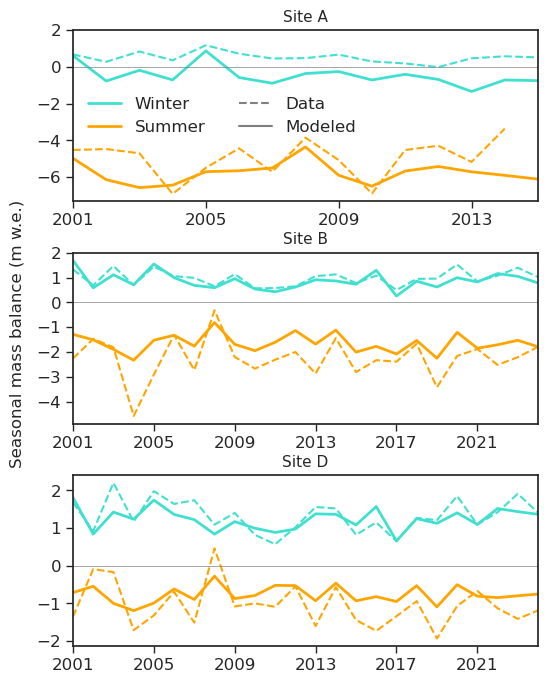

In [12]:
fig, axes = plt.subplots(3,figsize=(6,8),gridspec_kw={'hspace':0.3})
for ss,site in enumerate(['A','B','D']):
    try:
        ads,s,e = getds(f'../Output/EB/11_04/Gulkana_2024_11_04_long{site}_2.nc')
    except:
        # ads,s,e = getds(f'../Output/EB/11_04/Gulkana_2024_11_04_long{site}_1.nc')
        continue
        # ads
    axes[ss] = seasonal_mass_balance(site,ads,plot=True,plot_ax=axes[ss])
    axes[ss].set_ylabel('')
    axes[ss].set_title(f'Site {site}',fontsize=11)
    if ss != 0:
        axes[ss].get_legend().remove()
    else:
        axes[ss].set_yticks([-6,-4,-2,0,2])
    # fig,ax = visualize_layers(ads,pd.date_range(s,s+pd.Timedelta(days=365)),['layerdensity'])
fig.supylabel('Seasonal mass balance (m w.e.)',fontsize=12)
# plt.show()
plt.savefig('../Output/EB/longrun_11_04.png',dpi=180,bbox_inches='tight')
    # assert 1==0

Compare albedo

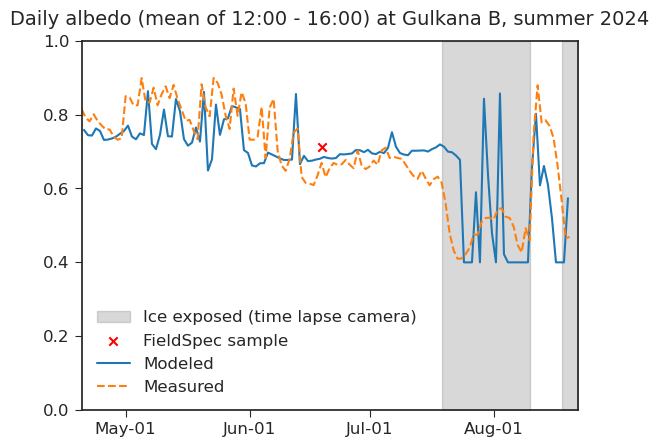

In [67]:
df = pd.read_csv('/home/claire/research/climate_data/AWS/Preprocessed/CLAWS_2024_allvars.csv',index_col=0)
df.index = pd.to_datetime(df.index) # - pd.Timedelta(hours=8)
# df['albedo'] = df['SWout'] / df['SWin']
daily_albedo = []
dates = pd.date_range('2024-04-20','2024-08-22',freq='d')
for date in dates:
    start = pd.to_datetime(str(date.date())+' 12:00')
    end = pd.to_datetime(str(date.date())+' 16:00')
    # print(df.loc[start:end,'albedo'].values)
    daily_albedo.append(np.mean(df.loc[start:end,'albedo']))
y = np.arange(0,1.1,0.1)
fig,ax = plt.subplots()
ax.fill_betweenx(y,[pd.to_datetime('2024-07-19')],[pd.to_datetime('2024-08-10')],color='grey',alpha=0.3,label='Ice exposed (time lapse camera)')
ax.fill_betweenx(y,[pd.to_datetime('2024-08-18')],[pd.to_datetime('2024-08-22')],color='grey',alpha=0.3)
ax.scatter(pd.to_datetime('2024-06-19'),0.7123,marker='x',color='red',label='FieldSpec sample')
ax.set_xlim(dates[0],dates[-1])
ax.set_ylim(0,1)
ax.tick_params(labelsize=12)
ax.set_xticks(pd.date_range(dates[0],dates[-1],freq='MS'))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b-%d'))
ax.set_title('Daily albedo (mean of 12:00 - 16:00) at Gulkana B, summer 2024',fontsize=14,y=1.02)
plt.tick_params(size=5)
dsp = bds.sel(time=pd.date_range('2024-04-20 14:00','2024-08-19 14:00'))
ax.plot(dsp.time,dsp['albedo'],label='Modeled')
ax.plot(dates,daily_albedo,label='Measured',linestyle='--')
ax.legend(fontsize=12)
plt.show()
# plt.savefig('/home/claire/research/Output/EB/albedo_modeled_11_05.png',dpi=150,bbox_inches='tight')


Site B internal acc: 0.00027 m w.e.


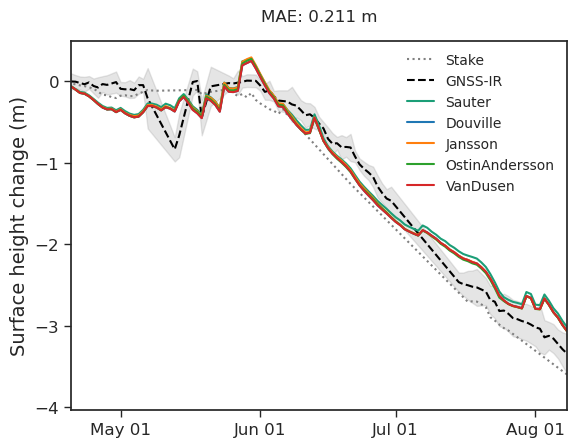

In [38]:
site = 'B'
fig,ax = plt.subplots()
for i in range(5):
    ds,s,e = getds(f'../Output/EB/gridsearch_11_06_B_set{i}_run0_3.nc')
    ksnow = ds.attrs['k_snow']
    if i == 0:
        ax,_ = cumulative_mass_balance(site,ds,plot=True,plot_ax=ax,label='Sauter')
    else:
        ds.dh.values = ds.dh.cumsum().values - ds.dh.isel(time=0).values
        dh = ds.sel(time=pd.date_range('2024-04-20','2024-08-20')).dh
        ax.plot(dh.time,dh.values,label=ksnow)
    ax.legend()

ACTUAL CALIBRATION

In [5]:
# Set up dictionary to store outputs
sitedict = {'2024':['AB','ABB','B','BD','D','T'],
         'long':['A','B','D']}
dsdict = {}

# Set the parameters we want to examine
params = {'kw':[1,2,2.5,3,4],
          'Boone_c5':[0.018,0.025,0.032,0.04],
          'kp':[2,2.5,3,3.5,4]}

# Transform params to strings for comparison
for key in params:
    for v,value in enumerate(params[key]):
        params[key][v] = str(value)

# Create nested dictionary
for run in ['2024','long']:
    dsdict[run] = {}
    sites = sitedict[run]
    for site in sites:
        dsdict[run][site] = {}
        for kw in params['kw']:
            dsdict[run][site][kw] = {}
            for c5 in params['Boone_c5']:
                dsdict[run][site][kw][c5] = {}
                for kp in params['kp']:
                    dsdict[run][site][kw][c5][kp] = {}

In [6]:
# PARSE 2024 RUNS
date = '11_08'
path_out = f'/home/claire/research/Output/EB/'
method = 'MAE'
for i in range(103):
    for j in range(6):
        try:
            fn = f'11_08_0/grid_11_08_set{i}_run{j}_0.nc'
            ds,startdate,enddate = getds(path_out+fn)
            kp = ds.attrs['kp']
            c5 = ds.attrs['c5']
            kw = ds.attrs['kw']
            site = ds.attrs['site']
            error = cumulative_mass_balance(site,ds,method=method)
            if kp in params['kp'] and kw in params['kw'] and c5 in params['Boone_c5']:
                dsdict['2024'][site][kw][c5][kp]['ds'] = ds
                dsdict['2024'][site][kw][c5][kp][method] = error
        except FileNotFoundError:
            continue
        # except KeyError:
        #     print(kp,c5,kw,site,fn)

In [14]:
# PARSE LONG RUNS
for i in range(103):
    for j in range(6):
        fn = f'11_08_1/grid_11_08_set{i}_run{j}_0.nc'
        try:
            ds,startdate,enddate = getds(path_out+fn)
            kp = ds.attrs['kp']
            c5 = ds.attrs['c5']
            kw = ds.attrs['kw']
            site = ds.attrs['site']
            winter,summer = seasonal_mass_balance(site,ds,method=method)
            if kp in params['kp'] and kw in params['kw'] and c5 in params['Boone_c5']:
                dsdict['long'][site][kw][c5][kp]['ds'] = ds
                dsdict['long'][site][kw][c5][kp]['winter'+method] = winter
                dsdict['long'][site][kw][c5][kp]['summer'+method] = summer
        except FileNotFoundError:
            continue

In [117]:
# See what's missing
missing_2024 = 0
missing_long = 0

for kw in params['kw']:
    for c5 in params['Boone_c5']:
        for kp in params['kp']:
            for site in sitedict['2024']:
                try:
                    fff = dsdict['2024'][site][kw][c5][kp]['ds']
                except:
                    # print('Missing 2024 runs',site,str(kw),str(c5),str(kp))
                    missing_2024 += 1
            for site in sitedict['long']:
                try:
                    fff = dsdict['long'][site][kw][c5][kp]['summer'+method]
                except:
                    # print('Missing long runs',site,str(kw),str(c5),str(kp))
                    missing_long += 1
print(f'Missing {missing_2024} 2024 runs and {missing_long} long runs')

Missing 0 2024 runs and 46 long runs


In [ ]:
all_combos = itertools.product(*params.values())
for idx, param_values in enumerate(all_combos):

In [12]:
labels = {'kp':'Precipitation factor','kw':'Wind factor','Boone_c5':'Densification c$_5$'}
medians = {'kp':'2.5','kw':'1','Boone_c5':'0.025'}
all_sites = sitedict['long']+sitedict['2024']+['mean']

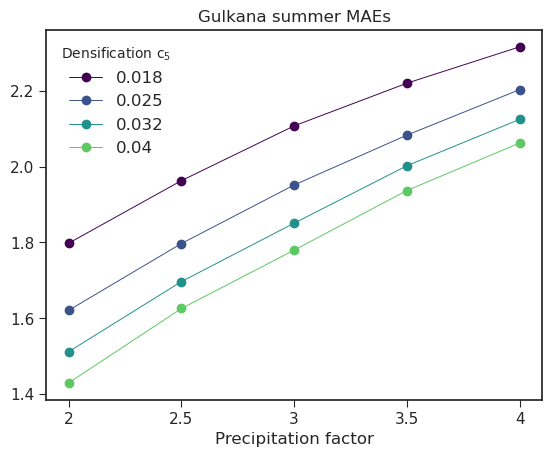

In [16]:
# run_name = '2024' # '2024','winter', or 'summer' 
for run_name in ['summer']: # '2024','winter',
    # Parse run info
    run = '2024' if run_name == '2024' else 'long'
    if run == 'long':
        err_name = run_name + method
    else:
        err_name = method
    
    if run_name in ['summer','winter']:
        param_x = 'kp'
        param_z = 'Boone_c5'
    else:
        param_x = 'kw'
        param_z = 'Boone_c5'
    
    all_sites = sitedict[run]+['mean']

    # for site in all_sites:
    for site in ['mean']:
        fig,ax = plt.subplots()
        param_x_arr = np.array(params[param_x],dtype=str)
        param_z_arr = np.array(params[param_z],dtype=str)
        rmses = np.empty([len(param_x_arr),len(param_z_arr)])

        if 'kw' not in [param_x,param_z]:
            kw = medians['kw']
        if 'kp' not in [param_x,param_z]:
            kp = medians['kp']
        if 'Boone_c5' not in [param_x,param_z]:
            c5 = medians['Boone_c5']

        norm = mpl.colors.Normalize(vmin=0,vmax=len(param_z_arr))
        cmap = mpl.colormaps.get_cmap('viridis')
        for zz,zval in enumerate(param_z_arr):
            for xx,xval in enumerate(param_x_arr):
                if param_x == 'kw':
                    kw = xval
                elif param_z == 'kw':
                    kw = zval
                if param_x == 'kp':
                    kp = xval
                elif param_z == 'kp':
                    kp = zval
                if param_x == 'Boone_c5':
                    c5 = xval
                elif param_z == 'Boone_c5':
                    c5 = zval

                if site == 'mean':
                    site_vals = []
                    for s in sitedict[run]:
                        if err_name in dsdict[run][s][kw][c5][kp]:
                            site_vals.append(dsdict[run][s][kw][c5][kp][err_name])
                        else:
                            site_vals.append(np.nan)
                    rmses[xx,zz] = np.nanmean(site_vals)
                else:
                    if site in sitedict[run] and err_name in dsdict[run][site][kw][c5][kp]:
                        rmses[xx,zz] = dsdict[run][site][kw][c5][kp][err_name]
                    else:
                        rmses[xx,zz] = np.nan
            ax.plot(param_x_arr,rmses[:,zz],color=cmap(norm(zz)),label=str(zval),marker='o',linewidth=0.7)

        ax.legend(title=labels[param_z],fontsize=12)
        ax.set_xlabel(labels[param_x],fontsize=12)
        title = f'Gulkana {run_name} {method}s'
        if site != 'mean':
            title += f' at site {site}'
        ax.set_title(title)
        ax.tick_params(length=5,labelsize=11)
        plt.savefig(f'../Output/EB/{run_name}_{site}.png')
        plt.show()

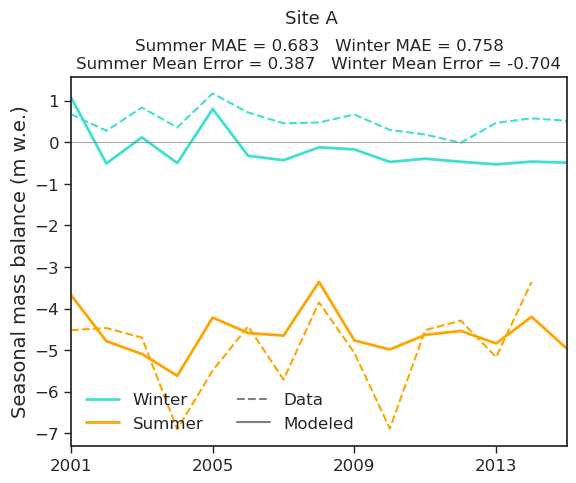

In [115]:
for site in ['A']:
    ds = dsdict['long'][site]['3']['0.018']['2.5']['ds']
    fig,ax = seasonal_mass_balance(site,ds,plot=True)
    fig.suptitle(f'Site {site}',y=1.02,fontsize=13)

In [6]:
result_df = pd.DataFrame(data=np.zeros((len(sites),3)),columns=sites,index=['kp','kw','a_ice'])
for site in sites:
    ds = best[site]
    result_df.loc['kp',site] = float(ds.attrs['kp'])
    if site == 'D':
        result_df.loc['kw',site] = 2 #float(ds.attrs['kw'])
        result_df.loc['a_ice',site] = 0.4
    else:
        result_df.loc['a_ice',site] = float(ds.attrs['a_ice'])
        result_df.loc['kw',site] = 3
# result_df.to_csv(f'/home/claire/research/Gulkana_params_{date}_HIGHWIND.csv',sep=',')
print(result_df)

         AB    B    D
kp     3.20  3.2  3.2
kw     3.00  3.0  2.0
a_ice  0.25  0.4  0.4


In [234]:
path_out = '/home/claire/research/Output/calibration/09_24/'

# Parameter sets
aa = [0.2,0.4,0.6]
ww = [0.25,0.5,0.75,1]
kk = ['Sturm','Douville','Jansson'] #,'OstinAndersson','VanDusen']
params_dict = {'kw':ww,'k_snow':kk,'a_ice':aa} # 'kw':ww,

# Get the lengths of each parameter list for the result array shape
shape = [len(v) for v in params_dict.values()]

# Initialize result arrays with a dimension for site (3 sites + 1 for the average)
winter_result = np.ones([4] + shape)
summer_result = np.ones([4] + shape)

# Initialize lists for storing the parameters
params_list = {key: [] for key in params_dict}

# Generate combinations of all parameters
all_combos = itertools.product(*params_dict.values())
for idx, param_values in enumerate(all_combos):
    # Unpack indices
    indices = np.unravel_index(idx, shape)

    # Store parameter set
    for param_name, param_value in zip(params_dict.keys(), param_values):
        params_list[param_name].append(param_value)
    
    # Iterate over sites
    for s, site in enumerate(['AB', 'B', 'D']):
        kw = 0.25 if site == 'D' else 1
        fn = f'kw{kw}_'

        # fn = ''
        for param_name, param_value in zip(params_dict.keys(), param_values):
            fn += param_name.replace('_','')+str(param_value)+'_'
        fn += f'site{site}_0.nc'

        try:
            ds, startdate, enddate = getds(path_out + fn)
            winter, summer = seasonal_mass_balance(data_fp, ds, site=site, method='MAE')
        except:
            winter, summer = (np.nan, np.nan)
            print(fn + ' does not exist')
        
        # Store results in the corresponding array
        winter_result[s][indices] = winter
        summer_result[s][indices] = summer

    # Compute site averages and store in the last index (3rd index in the result arrays)
    winter_result[3][indices] = np.mean(winter_result[:3,*indices])
    summer_result[3][indices] = np.mean(summer_result[:3,*indices])